# Test of the ensemble on the test set

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import DBNets
import pandas as pd
import matplotlib

#setting plots for mnras
import matplotlib.pyplot as plt
SMALL_SIZE=9
MEDIUM_SIZE=9
BIGGER_SIZE=9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.rm'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.it'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.bf'] = 'STIXGeneral'

import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='Nimbus Roman')

## Training results: achieved scores

In [2]:
scores = pd.read_csv('../../../DBNets_old/trained/final_allt/scores.data')
scores

,name,fold,train_score,test_score,extime
0,time1000.9,1,-1.735679,-1.471966,5552.959358
1,time1000.5,1,-1.751934,-1.431963,7902.737882
2,time1000.2,1,-1.846708,-1.501999,8034.749518
3,time1000.7,1,-1.805267,-1.488846,8284.995412
4,time1000.3,1,-1.579676,-1.415903,8899.065096
5,time1000.0,1,-1.755644,-1.476992,10260.007322
6,time1000.8,1,-1.788361,-1.403382,10354.405972
7,time1000.6,1,-1.877796,-1.446384,11081.083961
8,time1000.4,1,-1.829899,-1.435788,11428.408963
9,time1000.1,1,-1.862547,-1.522514,12509.116559


### Historys

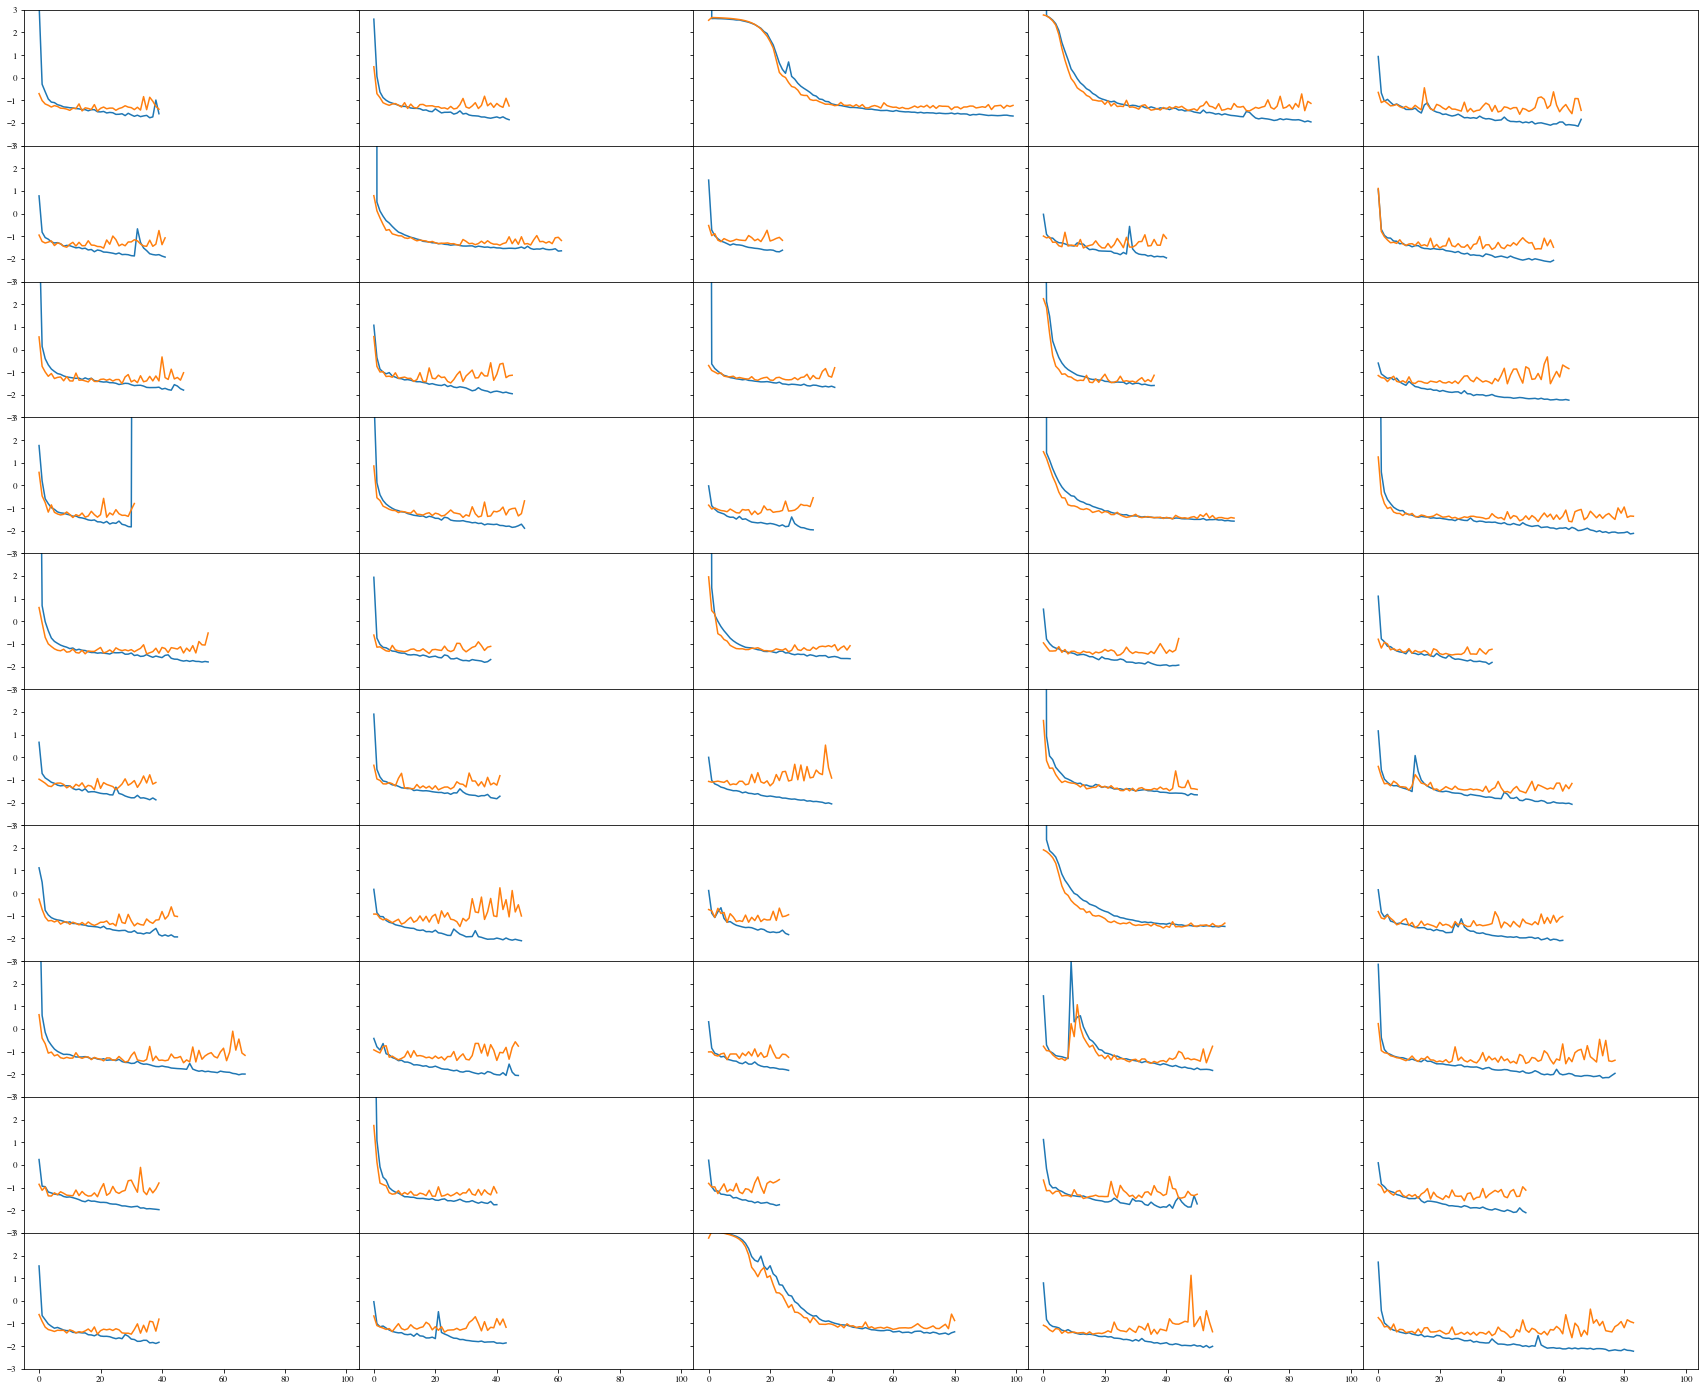

In [3]:
import pickle
name = '../../../DBNets_old/trained/final_allt/'
fig, axs = plt.subplots(10,5, figsize=(30,25), sharex=True, sharey=True, gridspec_kw={'hspace':0, 'wspace':0})
for i in range(0,10):
    for j in range(0,5):
        with open(f'{name}time1000.{i}.{j+1}/history.hist', 'rb') as hist:
            history = pickle.load(hist)
        axs[i][j].plot(history['loss'], label='Training set')
        axs[i][j].plot(history['val_loss'], label='Test set')
        axs[i][j].set_ylim(-3,3)

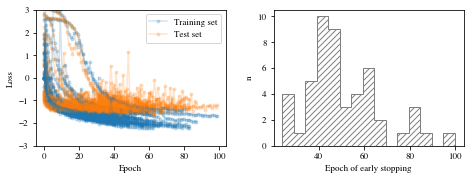

In [4]:
import pickle
import matplotlib


name = '../../../DBNets_old/trained/final_allt/'
fig, axs = plt.subplots(1,2, figsize=(23/3,2.5), gridspec_kw={'hspace':0, 'wspace':0.25})
lent = []
for i in range(0,10):
    for j in range(0,5):
        with open(f'{name}time1000.{i}.{j+1}/history.hist', 'rb') as hist:
            history = pickle.load(hist)
            history['loss'] = np.array(history['loss'])
            history['loss'][history['loss']>3] = 0
        lent.append(len(history['loss']))
        if i==j==0:
            axs[0].plot(range(len(history['loss'])),history['loss'], label='Training set',color='tab:blue', alpha=0.2,zorder=10, marker='.')
            axs[0].plot(range(len(history['val_loss'])),history['val_loss'], label='Test set',color='tab:orange',  zorder=-10, alpha=0.2, marker='.')
        else:
            axs[0].plot(range(len(history['loss'])),history['loss'],color='tab:blue', alpha=0.2, marker='.', zorder=-10)
            axs[0].plot(range(len(history['val_loss'])),history['val_loss'], color='tab:orange',  alpha=0.2,zorder=-10, marker='.')
        axs[0].set_rasterization_zorder(0)
        axs[0].set_ylim(-3,3)
        axs[0].set_xlabel('Epoch')
        axs[0].set_ylabel('Loss')
        axs[0].legend()

axs[1].hist(lent, color='gray', fill=None, histtype='step', hatch='////', bins=15)
axs[1].set_xlabel('Epoch of early stopping')
axs[1].set_ylabel('n')
plt.savefig('images/trainingfig.pdf', bbox_inches='tight', dpi=500)

## Loading the results

In [5]:
#logM/Mj of target (assuming M* = 1 M_sun)
mtarget = np.load(f'mtarget.npy')

#logM/Mj predicted (median of the returned pdf)
comppred = np.load('comppred.npy')
mpred = comppred[:,0]

sigmas = 0.5*(mpred-comppred[:,1])+0.5*(comppred[:,2]-mpred)
merr = (10**mpred-10**comppred[:,1], 10**comppred[:,2]-10**mpred)

relerr = np.abs((10**mpred-10**mtarget)/10**mtarget)

# Results

### Relative error

In [6]:
relerr = np.abs((10**mpred-10**mtarget)/10**mtarget)

(array([620., 585., 417., 242., 108.,  65.,  37.,  26.,  16.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

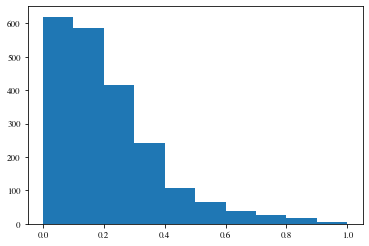

In [7]:
plt.hist(relerr, range=(0, 1))

In [8]:
relerr.mean()

0.23801907405588882

In [9]:
np.median(relerr)

0.174707628433999

## Scatter plot without errors

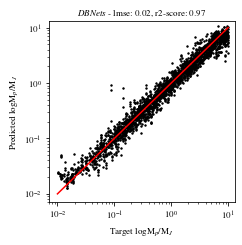

In [13]:
plt.gcf().set_size_inches(10/3, 10/3)
plt.scatter(10**mtarget, 10**mpred,color='black', marker='.', s=8, zorder=-10)
plt.plot([1e-2,10 ], [1e-2, 10],color='red')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2-0.003,13)
plt.xlim(1e-2-0.003,13)
plt.gca().set_rasterization_zorder(0)
plt.xlabel('Target logM$_p$/M$_J$', size=9)
plt.ylabel('Predicted logM$_p$/M$_J$', size=9)
plt.title('$DBNets$ - lmse: 0.02, r2-score: 0.97')
plt.savefig('images/scatter.pdf', bbox_inches='tight', dpi=500)

### Connecting results with the parameter space

In [14]:
# legare parametri alle simulazioni
para = pd.read_csv('../../../data/datarun4/param_sampling/run4_complete.csv', index_col=0)
para['St'] = para['InvStokes1']**-1

In [15]:
def getpara(mtarg):
    return para[np.log10(para['PlanetMass'])==mtarg-3]

In [16]:
parastr = ['PlanetMass', 'St', 'Alpha', 'AspectRatio', 'FlaringIndex']
allp = {'PlanetMass':[], 'St':[], 'Alpha':[], 'AspectRatio':[], 'FlaringIndex':[]}
ind = []
for el in mtarget:
    par = getpara(el)
    for p in parastr:
        allp[p].append(par[p].tolist()[0])
    ind.append(par.index.tolist()[0])

### Outliers

In [17]:
err = np.abs(mtarget-mpred)
filt = err > 0.50

In [18]:
ind = np.array(ind)

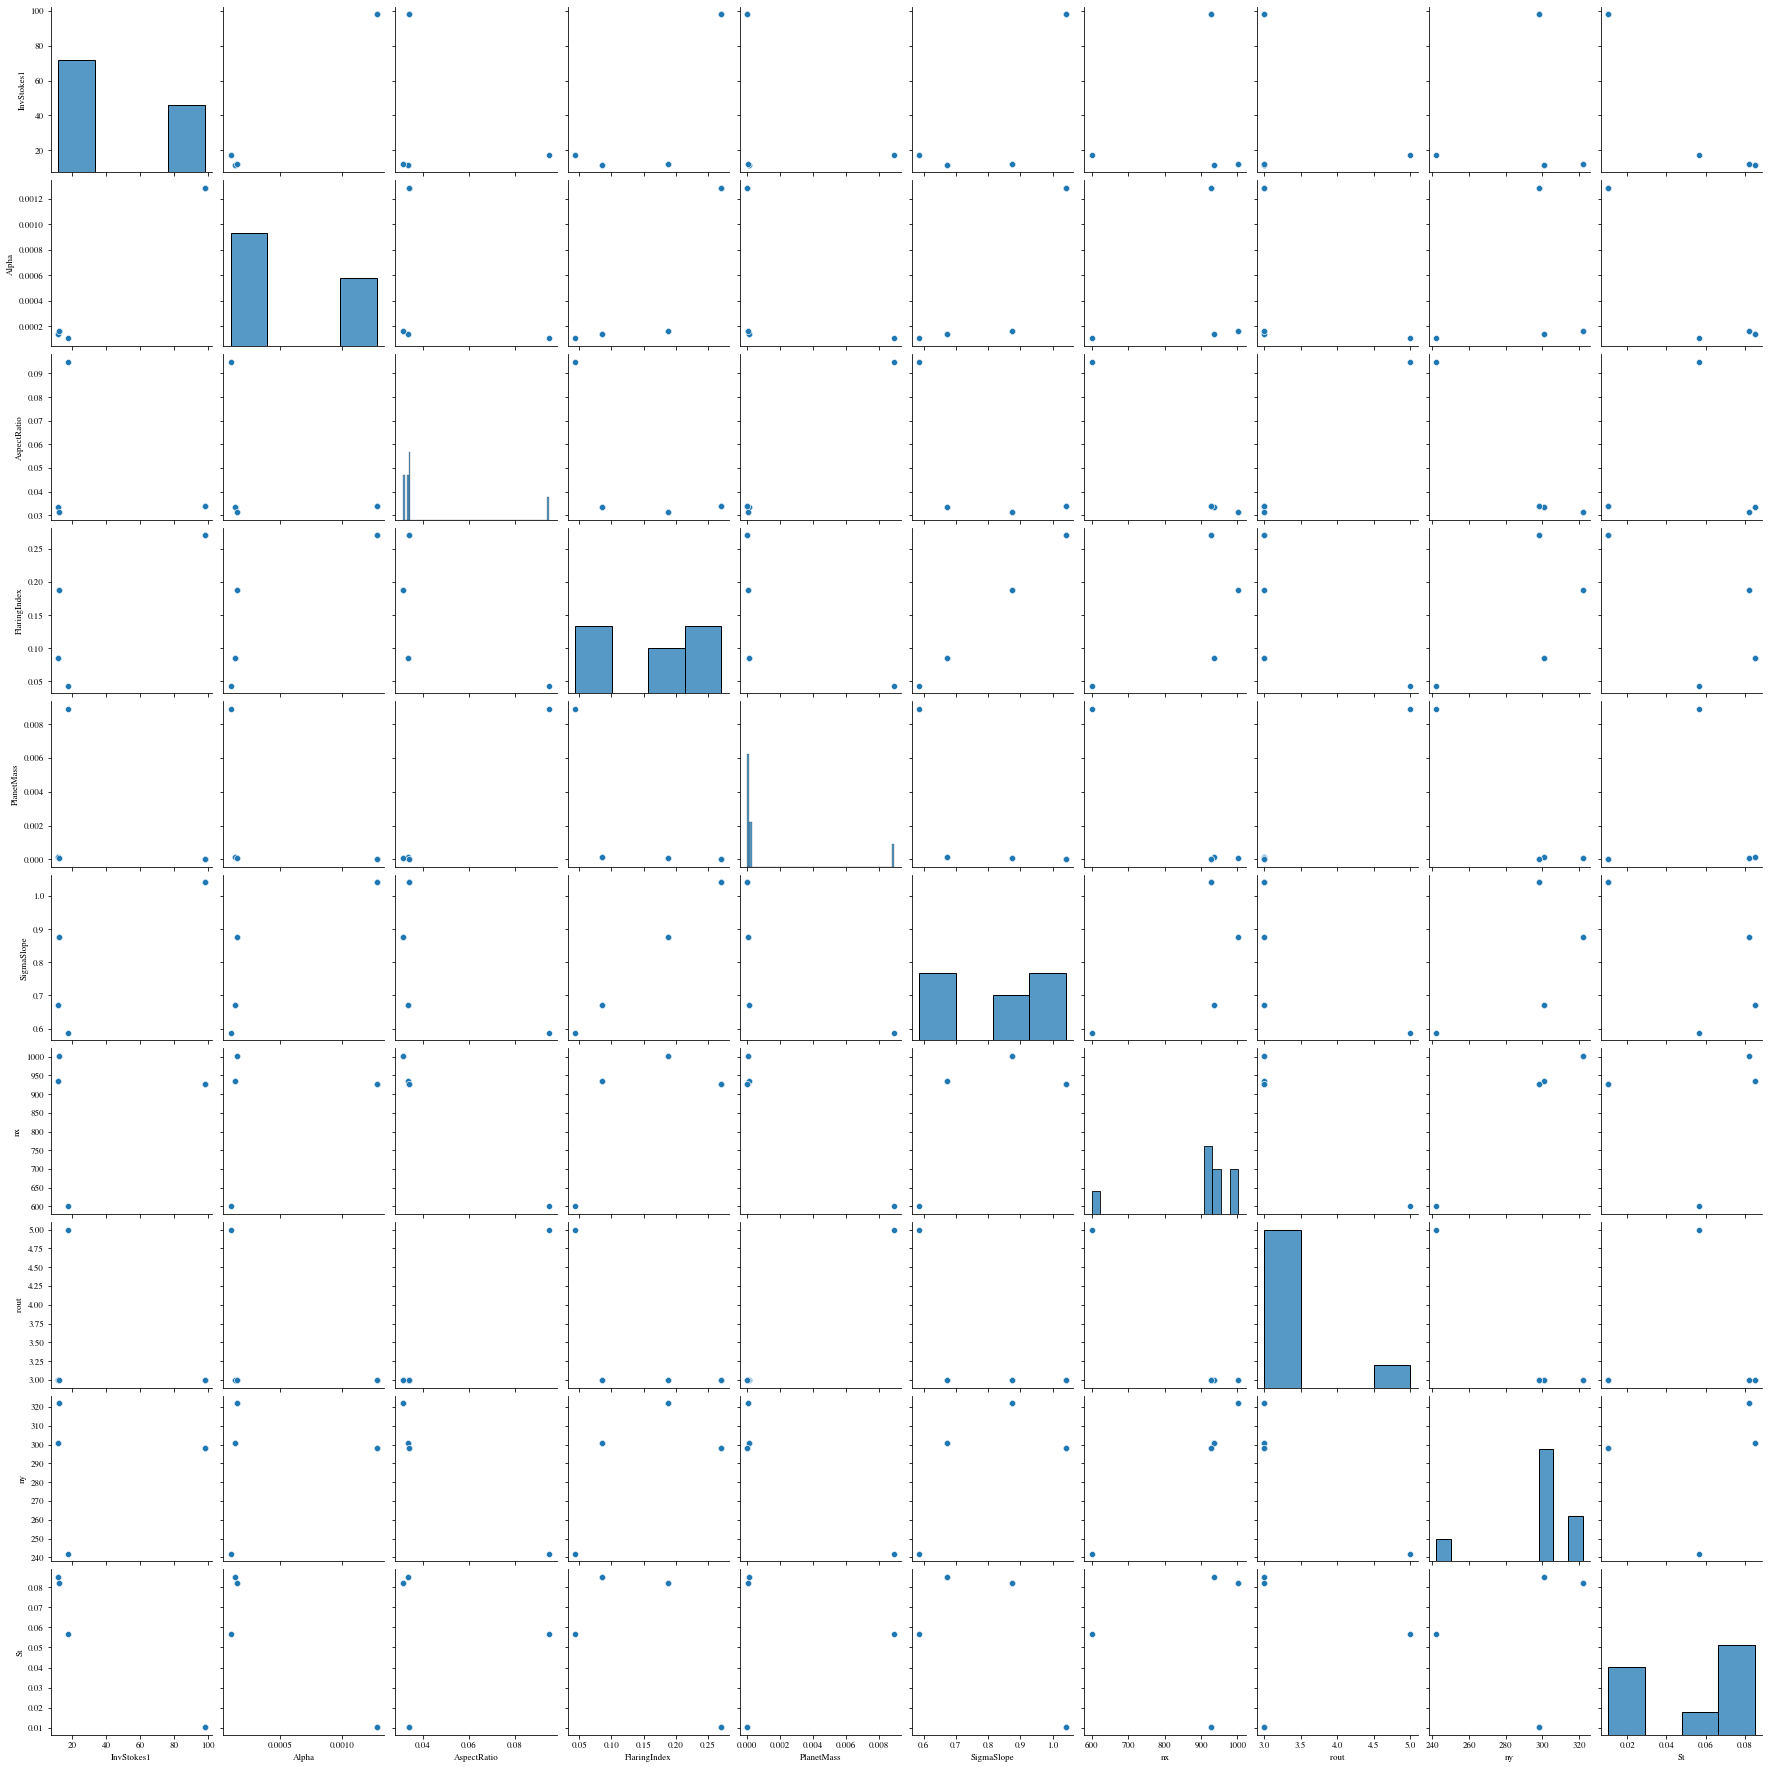

In [19]:
import seaborn as sns
sns.pairplot(para.loc[ind[filt]])

In [20]:
para.loc[ind[filt]]

,InvStokes1,Alpha,AspectRatio,FlaringIndex,PlanetMass,SigmaSlope,nx,rout,ny,St
260,11.721954,0.000138,0.033605,0.085575,0.000143,0.67115,935.0,3,301.0,0.085310
260,11.721954,0.000138,0.033605,0.085575,0.000143,0.67115,935.0,3,301.0,0.085310
318,12.161860,0.000159,0.031365,0.187775,0.000089,0.87555,1002.0,3,322.0,0.082224
975,97.948999,0.001285,0.033885,0.270725,0.000011,1.04145,927.0,3,298.0,0.010209
318,12.161860,0.000159,0.031365,0.187775,0.000089,0.87555,1002.0,3,322.0,0.082224
975,97.948999,0.001285,0.033885,0.270725,0.000011,1.04145,927.0,3,298.0,0.010209
975,97.948999,0.001285,0.033885,0.270725,0.000011,1.04145,927.0,3,298.0,0.010209
556,17.660378,0.000104,0.095065,0.043575,0.008923,0.58715,600.0,5,242.0,0.056624


## The outliers are mainly determined by the aspect ratio!

Text(0, 0.5, 'Predicted logM$_p$/M$_J$')

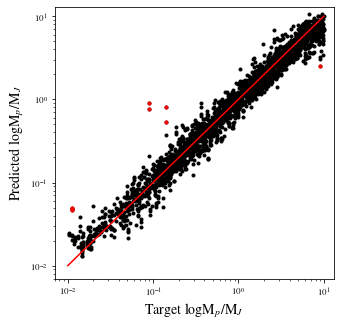

In [21]:
plt.gcf().set_size_inches(5,5)
plt.scatter(10**mtarget, 10**mpred,color='black', marker='.')
plt.scatter(10**mtarget[filt], 10**mpred[filt],color='red', marker='.')
plt.plot([1e-2,10 ], [1e-2, 10],color='red')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2-0.003,13)
plt.xlim(1e-2-0.003,13)
plt.xlabel('Target logM$_p$/M$_J$', size=14)
plt.ylabel('Predicted logM$_p$/M$_J$', size=14)

## With errors

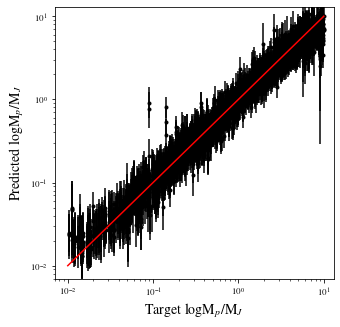

In [22]:
plt.gcf().set_size_inches(5,5)
plt.errorbar(10**mtarget, 10**mpred,color='black', yerr=merr, fmt='.', zorder=1)
plt.plot([1e-2,10 ], [1e-2, 10],color='red')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2-0.003,13)
plt.xlim(1e-2-0.003,13)
plt.xlabel('Target logM$_p$/M$_J$', size=14)
plt.ylabel('Predicted logM$_p$/M$_J$', size=14)
plt.savefig('images/errorscatter.pdf',bbox_inches='tight')

## Standardized error in function of planet mass

In [27]:
# note: you have to compile these two cells twice

In [25]:
from scipy import interpolate as interp
data = values[0]
p16 = []
p84 = []
median = []
for data in values:
    total = data.sum()
    median_v = total/2
    p84_v = total*84/100
    p16_v = total*16/100
    cumsum = data.cumsum()
    cumu = interp.interp1d(cumsum,np.linspace(-3,3, len(cumsum)), kind='linear')
    
    p16.append(cumu(p16_v))
    p84.append(cumu(p84_v))
    median.append(cumu(median_v))
    

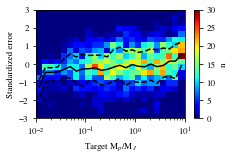

In [28]:
from scipy.ndimage import gaussian_filter1d as gf
from scipy.stats import binned_statistic as bs

le = (mtarget-mpred)/sigmas
plt.gcf().set_size_inches(10/3,2)
xbins = np.logspace(-2,1, 25)
values, m_tar_grid, err_grid, _= plt.hist2d(10**mtarget, le, range=((0.01,1), (-3,3)), bins=(xbins,20), cmap='jet', zorder=-10)

plt.xscale('log')
mid = 0.5*(err_grid[0:-1]+err_grid[1:])
midx = 0.5*(m_tar_grid[0:-1]+m_tar_grid[1:])
val = (mid*values).mean(axis=1)
for i in range(24):
    data = values[i]
    

med = values.sum(axis=1)/2
cumCols = np.cumsum(values, axis = 1)
im = [np.argmin(np.abs(cumCols[i,:]-med[i])) for i in range(len(med))]

plt.plot(midx, median, color='black')
plt.plot(midx, p16, '--',color='black')
plt.plot(midx, p84, '--', color='black')
plt.xlabel('Target M$_p$/M$_J$')
plt.ylabel("Standardized error")
plt.gca().set_rasterization_zorder(0)
cbar = plt.colorbar()
cbar.set_label('n')
plt.savefig('images/standardizederrorM.pdf', bbox_inches='tight', dpi=500)

## Metrics

In [25]:
#lmse
lmse = ((mpred-mtarget)**2).mean()
print(f'lmse: {lmse:.3}')

lmse: 0.0169


In [35]:
l#r2
def r2score(y, y_pred):
    g = np.sum((y-y_pred)**2)
    yy = np.sum((y - np.mean(y))**2)
    return 1 -g/yy

r2 = r2score(10**mtarget, 10**mpred)
#r2score(np.log10(test_para['PlanetMass']*1e3), np.log10(mpred))
print(f'r2: {r2:.3}')

r2log = r2score(mtarget, mpred)
#r2score(np.log10(test_para['PlanetMass']*1e3), np.log10(mpred))
print(f'r2 log: {r2log:.3}')

NameError: name 'l' is not defined

# Testing the uncertainty

err mean: 2.36e-02, err std: 0.83


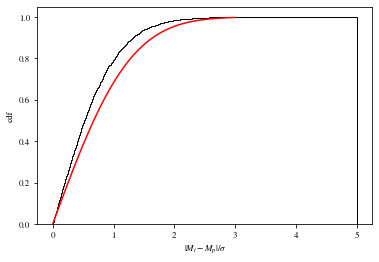

In [36]:
from scipy.stats import norm
x = np.linspace(0,3,1000)

err_log = (mtarget-mpred)/sigmas
plt.hist(np.abs(err_log), cumulative=True, bins=300, density=True, color='black', histtype='step', range=(0,5))
plt.plot(x, norm.cdf(x)-norm.cdf(-x), color='red')
plt.xlabel('$|M_t - M_p|/\sigma$')
plt.ylabel('cdf')
print(f'err mean: {err_log.mean():.2e}, err std: {err_log.std():.2f}')

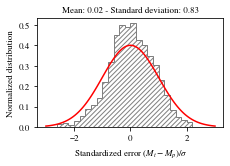

In [37]:
x = np.linspace(-3,3,100)
plt.gcf().set_size_inches(10/3,2)
plt.hist(err_log, bins=30, density=True, color='gray',histtype='step',hatch='/////',range=(-3,3))
plt.plot(x, norm.pdf(x), color='red')
plt.xlabel('Standardized error $(M_t - M_p)/\sigma$')
plt.ylabel('Normalized distribution')
plt.title(f'Mean: {err_log.mean():.2f} - Standard deviation: {err_log.std():.2f}')
plt.savefig('images/stderrhist.pdf', bbox_inches='tight')

## Analysis of the uncertainties

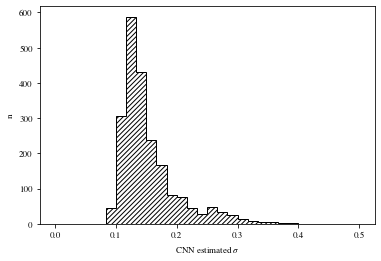

In [38]:
plt.gcf().set_size_inches(6,4)
plt.hist(sigmas,bins=30, range=(0,0.5), color='black', hatch='/////', histtype='step', fill=None)

plt.xlabel('CNN estimated $\sigma$')
plt.ylabel('n')
plt.savefig('images/errordist.pdf', bbox_inches='tight')

# In the parameter space

In [39]:
para

,InvStokes1,Alpha,AspectRatio,FlaringIndex,PlanetMass,SigmaSlope,nx,rout,ny,St
0,377.572191,0.008299,0.031715,0.258475,0.000139,1.01695,991.0,3,319.0,0.002649
1,28.379190,0.000147,0.077285,0.099575,0.000060,0.69915,600.0,3,193.0,0.035237
2,205.589060,0.000154,0.057615,0.165025,0.000559,0.83005,600.0,3,193.0,0.004864
3,601.173737,0.000509,0.096115,0.334775,0.002195,1.16955,600.0,3,193.0,0.001663
4,209.411246,0.002636,0.047675,0.131075,0.000451,0.76215,659.0,3,212.0,0.004775
...,...,...,...,...,...,...,...,...,...,...
995,250.610925,0.000138,0.078405,0.130025,0.007612,0.76005,600.0,5,242.0,0.003990
996,15.595525,0.000526,0.042635,0.142275,0.000015,0.78455,737.0,3,237.0,0.064121
997,131.522483,0.000249,0.046695,0.148225,0.000014,0.79645,673.0,3,217.0,0.007603
998,342.767787,0.000330,0.070565,0.336175,0.000674,1.17235,600.0,3,193.0,0.002917


In [40]:
parastr = ['PlanetMass', 'St', 'Alpha', 'AspectRatio', 'FlaringIndex']
para['sigma'] = 0
for i, indd in enumerate(ind):
    para.loc[indd, 'sigma'] = para.loc[indd, 'sigma']+0.3333*(mtarget[i]-mpred[i])/sigmas[i]
for p in parastr:
    para[f'l{p}']= np.log10(para[p])

In [41]:
p1 = 'lPlanetMass'
p2 = 'lAlpha'
def getgrid(p1, p2):
    gx = np.linspace(para[p1].min(),para[p1].max(),4)
    gy = np.linspace(para[p2].min(),para[p2].max(),4)
    grid = [[para[(para[p1]>gx[i]) & (para[p1]<gx[i+1]) &
              (para[p2]>gy[j]) & (para[p2]<gy[j+1])]['sigma'].tolist()
        for i in range(len(gx)-1)] for j in range(len(gy)-1)]
    ggridm = np.ones((3,3))
    ggrids = np.ones((3,3))
    ggridn = np.ones((3,3))
    for i in range(3):
        for j in range(3):
            ggridm[i,j] = np.sum(grid[i][j])/np.count_nonzero(grid[i][j])
            ggrids[i,j] = np.sum((grid[i][j]-ggridm[i,j])**2)/(np.count_nonzero(grid[i][j])-1)
            ggridn[i,j] = np.count_nonzero(grid[i][j])
    return gx, gy, ggridm, ggrids, ggridn

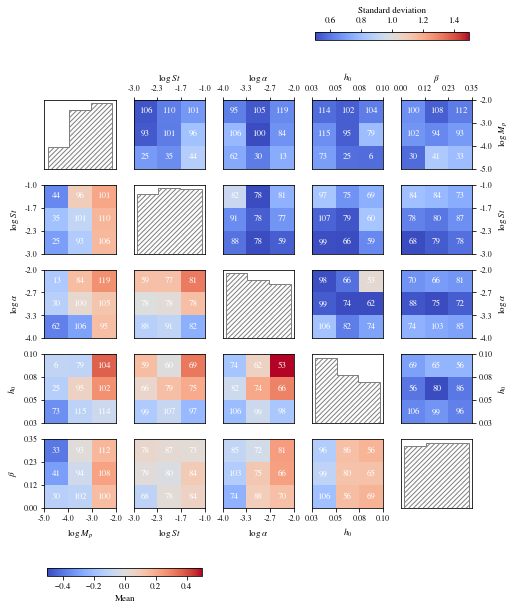

In [42]:
import matplotlib

parastr = ['lPlanetMass', 'lSt', 'lAlpha', 'AspectRatio', 'FlaringIndex']
labels = ['log $M_p$', 'log $St$', 'log $\\alpha$', '$h_0$', '$\\beta$']
fig, axs = plt.subplots(7, 5, figsize=(23/3,10), gridspec_kw={"height_ratios":[0.75,1,1,1,1,1,0.75], 'hspace':0.25, 'wspace':0.25})
for row in range(5): 
    for col in range(5): 
        p1 = parastr[col]
        p2 = parastr[row]
        l1 = labels[col]
        l2 = labels[row]
        coll=col
        roww=row+1
        if row>col:
            gx, gy, m, s, n = getgrid(p1,p2)
            c1 = axs[roww,coll].pcolormesh(m, cmap='coolwarm', vmax=0.5, vmin=-0.5)
            for i in range(len(gx)-1):
                for j in range(len(gy)-1):
                    axs[roww, coll].text(i+0.5, j+0.5, f'{int(n[j,i])}', ha="center", va="center", color='white')
        if row<col:
            gx, gy, m, s, n = getgrid(p1,p2)
            c2 = axs[roww,coll].pcolormesh(s**0.5, vmax=1.5, vmin=0.5, cmap='coolwarm')
            for i in range(len(gx)-1):
                for j in range(len(gy)-1):
                    axs[roww, coll].text(i+0.5, j+0.5, f'{int(n[j,i])}', ha="center", va="center", color='white')
        if col==0:
            if row!=0:
                axs[roww,coll].set_ylabel(l2, size=9)
                ytickl = [f'{yy:.1f}' for yy in gy]
                if p2=='AspectRatio' or p2=='FlaringIndex':
                    ytickl = [f'{yy:.2f}' for yy in gy]
                axs[roww,coll].set_yticks(range(4), ytickl, size=8)
        else:
            if col==4:
                if roww!=5:
                    axs[roww,coll].set_ylabel(l2, size=9)
                ytickl = [f'{yy:.1f}' for yy in gy]
                if p2=='AspectRatio' or p2=='FlaringIndex':
                    ytickl = [f'{yy:.2f}' for yy in gy]
                axs[roww,coll].set_yticks(range(4), ytickl, size=8)
                axs[roww, coll].yaxis.set_ticks_position('right')
                axs[roww, coll].yaxis.set_label_position('right')
            else:
                axs[roww,coll].set_yticks([])
                
                
        if row==4:
            if col!=4:
                axs[roww,coll].set_xlabel(l1, size=9)
            xtickl = [f'{xx:.1f}' for xx in gx]
            if p1=='AspectRatio' or p1=='FlaringIndex':
                xtickl = [f'{xx:.2f}' for xx in gx]
            axs[roww,coll].set_xticks(range(4), xtickl, size=8)
        else:
            if row==0:
                if col!=0:
                    axs[roww,coll].set_xlabel(l1, size=9)
                    xtickl = [f'{xx:.1f}' for xx in gx]
                    if p1=='AspectRatio' or p1=='FlaringIndex':
                        xtickl = [f'{xx:.2f}' for xx in gx]
                    axs[roww,coll].set_xticks(range(4), xtickl, size=8)
                    axs[roww, coll].xaxis.set_ticks_position('top')
                    axs[roww, coll].xaxis.set_label_position('top')
            else:
                axs[roww,coll].set_xticks([])
        if row==col:
            axs[roww,coll].hist(para.loc[ind][p1], bins=3, range=(para[p1].min(), para[p1].max()), histtype='step', hatch='/////', color='gray')
            
        
        if col==row==0 or col==row==4:
            axs[roww, coll].set_xticks([])
            axs[roww, coll].set_yticks([])
           
'''
for i in range(5):
    axs[i, 6].axis('off')
    axs[i, 6].axis('off')
cc2 = fig.colorbar(c2, ax=axs[0:2, 6], shrink=100,  pad=0)
cc2.set_label('Standard deviation', size=14)
cc1 = fig.colorbar(c1, ax=axs[3:5, 0], location='left', shrink=100, pad=0)
cc1.set_label('Mean', size=14)
'''
for i in range(5):
    axs[6,i].axis('off')
    axs[0,i].axis('off')
cc2 = fig.colorbar(c2, ax=axs[0, 3:5], shrink=100, location='top', pad=0)
cc2.set_label('Standard deviation', size=9)
cc1 = fig.colorbar(c1, ax=axs[6, 0:2], location='bottom', shrink=100, pad=0)
cc1.set_label('Mean', size=9)
fig.savefig('images/resparaw.pdf', bbox_inches='tight', dpi=500)

# Random guess

In [43]:
targrand = np.random.rand(len(mtarget))*3-5

In [44]:
lsme = ((mtarget-mtarget.mean())**2).mean()

In [45]:
lsme

0.5452809530295631

In [46]:
r2score(mtarget, targrand*0+mtarget.mean())

NameError: name 'r2score' is not defined

### extract experts predictions

In [34]:
for p in predobjs:
    p.set_ensemble_type('experts')

NameError: name 'predobjs' is not defined

In [56]:
import DGBNets as dbnets
from scipy.stats import norm
def extract_prediction(logmrv, equivalent_sigma=1, return_log=False):
        log_m_predicted = logmrv.ppf(0.5)
        m_predicted = 10**log_m_predicted

        log_right_lim = logmrv.ppf(norm.cdf(equivalent_sigma))
        log_left_lim = logmrv.ppf(norm.cdf(-equivalent_sigma))

        right_lim = 10**log_right_lim
        left_lim = 10**log_left_lim

        if return_log:
            return log_m_predicted, log_left_lim, log_right_lim
        else:
            return m_predicted, left_lim, right_lim

compmpred = np.array([np.array(extract_prediction(res, return_log=True)) for res in tqdm(predobjs)])

2023-09-27 23:04:07.679722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 23:04:07.850434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 23:04:07.851843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 23:04:09.473930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NameError: name 'predobjs' is not defined

In [84]:
mpred_ex = compmpred[:,0]
sigma_ex = 0.5*(mpred_ex-compmpred[:,1])+0.5*(compmpred[:,2]-mpred_ex)
stderr_peers = (mpred-mtarget)/sigmas
stderr_ex = (mpred_ex-mtarget)/sigma_ex
sigma_phy =  np.array([ res.scales.mean() for res in tqdm(predobjs)])
sigma_model =  np.array([ res.locs.std() for res in tqdm(predobjs)])

100%|████████████████████████████████████| 2151/2151 [00:00<00:00, 78739.98it/s]


In [85]:
np.save('savings/sigma_phy.npy',sigma_phy)
np.save('savings/sigma_model.npy', sigma_model)
np.save('savings/sigmas_test.npy', sigmas)

In [47]:
sigma_phy = np.load('savings/sigma_phy.npy')
sigma_model = np.load('savings/sigma_model.npy')

#### image comparing physics and model uncertainty

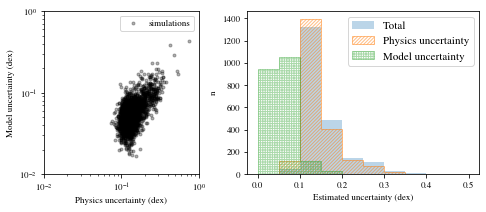

In [48]:
fig, axs = plt.subplots(1,2, figsize=(7.8,3), gridspec_kw={"width_ratios":[0.4,0.6], 'wspace':0.25})

axs[0].scatter(sigma_phy, sigma_model, marker='.', color='black', alpha=0.3, label='simulations')
#axs[0].scatter(real['phyunc'], real['modelunc'], marker='*', color='red', alpha=0.5, label='observations')
axs[0].set_xscale('log')
axs[0].set_xlim(0.01,1)
axs[0].set_ylim(0.01,1)
axs[0].set_xlabel('Physics uncertainty (dex)')
axs[0].set_ylabel('Model uncertainty (dex)')
axs[0].set_yscale('log')
axs[0].legend()

axs[1].hist(sigmas, range=(0,0.5), label='Total', alpha=0.3)
axs[1].hist(sigma_phy, range=(0,0.5), label='Physics uncertainty', hatch='///////', histtype='step', alpha=0.5)
axs[1].hist(sigma_model, range=(0,0.5), label='Model uncertainty', histtype='step', alpha=0.4, hatch='+++++')
axs[1].legend(fontsize=11)
axs[1].set_xlabel('Estimated uncertainty (dex)')
axs[1].set_ylabel('n')

plt.savefig('images/physicsvsmodel.pdf', bbox_inches='tight')

#### Image comparing physics and model uncertainty wrt the real error

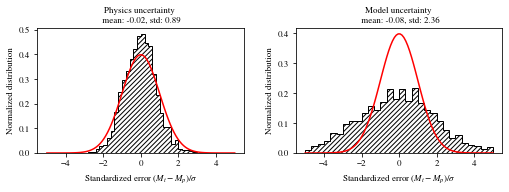

In [56]:
fig, axs = plt.subplots(1,2, figsize=(25/3,2.3), gridspec_kw={"width_ratios":[0.5,0.5], 'wspace':0.25})

stderr_phys = (mpred-mtarget)/sigma_phy
stderr_model = (mpred-mtarget)/sigma_model
x = np.linspace(-5,5,100)
axs[0].hist(stderr_phys, bins=30, density=True, color='black',histtype='step',hatch='/////',range=(-3,3))
axs[0].plot(x, norm.pdf(x), color='red')
axs[0].set_xlabel('Standardized error $(M_t - M_p)/\sigma$')
axs[0].set_ylabel('Normalized distribution')
axs[0].set_title(f'Physics uncertainty \n mean: {stderr_phys.mean():.2f}, std: {stderr_phys.std():.2f}')

axs[1].hist(stderr_model, bins=30, density=True, color='black',histtype='step',hatch='/////',range=(-5,5))
axs[1].plot(x, norm.pdf(x), color='red')
axs[1].set_xlabel('Standardized error $(M_t - M_p)/\sigma$')
axs[1].set_ylabel('Normalized distribution')
axs[1].set_title(f'Model uncertainty \n mean: {stderr_model.mean():.2f}, std: {stderr_model.std():.2f}')

plt.savefig('images/physicsvsmodelstderr.pdf', bbox_inches='tight', dpi=500)

#### In the parameters' space

In [92]:
# legare parametri alle simulazioni
para = pd.read_csv('../../../data/datarun4/param_sampling/run4_complete.csv', index_col=0)
para['St'] = para['InvStokes1']**-1
def getpara(mtarg):
    return para[np.log10(para['PlanetMass'])==mtarg-3]

parastr = ['PlanetMass', 'St', 'Alpha', 'AspectRatio', 'FlaringIndex']
allp = {'PlanetMass':[], 'St':[], 'Alpha':[], 'AspectRatio':[], 'FlaringIndex':[]}
ind = []
for el in mtarget:
    par = getpara(el)
    for p in parastr:
        allp[p].append(par[p].tolist()[0])
    ind.append(par.index.tolist()[0])
    
para.loc[ind]['s'] = mtarget

para['sigma_p'] = 0
for i, indd in enumerate(ind):
    para.loc[indd, 'sigma_p'] = para.loc[indd, 'sigma_p']+0.3333*sigma_phy[i]
para['sigma_m'] = 0
for i, indd in enumerate(ind):
    para.loc[indd, 'sigma_m'] = para.loc[indd, 'sigma_m']+0.3333*sigma_model[i]
for p in parastr:
    para[f'l{p}']= np.log10(para[p])

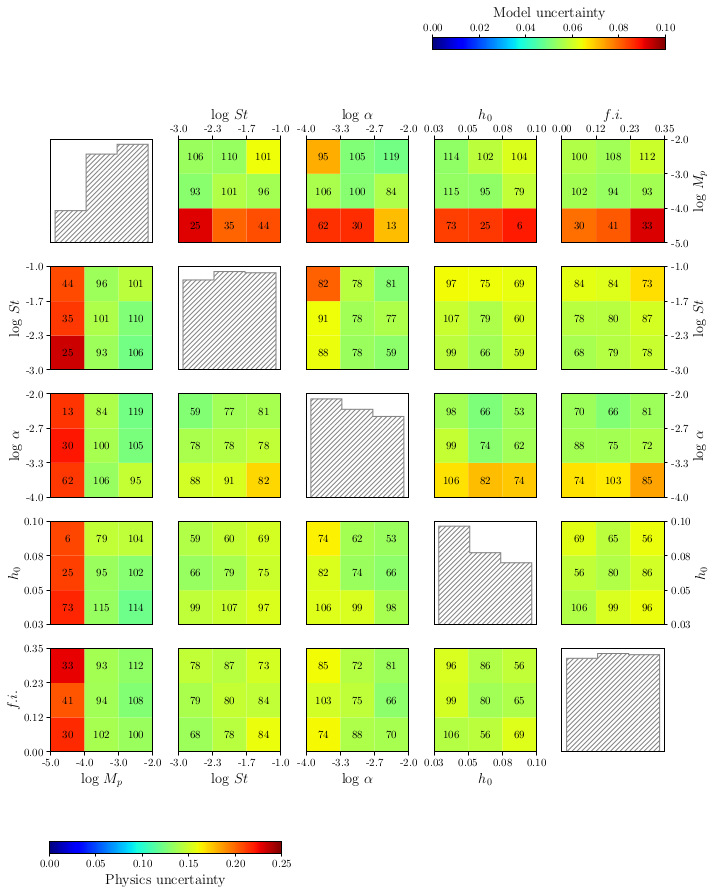

In [94]:
def getgrid(p1, p2):
    gx = np.linspace(para[p1].min(),para[p1].max(),4)
    gy = np.linspace(para[p2].min(),para[p2].max(),4)
    grid1 = [[para[(para[p1]>gx[i]) & (para[p1]<gx[i+1]) &
              (para[p2]>gy[j]) & (para[p2]<gy[j+1])]['sigma_p'].tolist()
        for i in range(len(gx)-1)] for j in range(len(gy)-1)]
    grid2 = [[para[(para[p1]>gx[i]) & (para[p1]<gx[i+1]) &
              (para[p2]>gy[j]) & (para[p2]<gy[j+1])]['sigma_m'].tolist()
        for i in range(len(gx)-1)] for j in range(len(gy)-1)]
    ggridp = np.ones((3,3))
    ggridm = np.ones((3,3))
    ggridn = np.ones((3,3))
    for i in range(3):
        for j in range(3):
            ggridp[i,j] = np.sum(grid1[i][j])/np.count_nonzero(grid1[i][j])
            ggridm[i,j] = np.sum(grid2[i][j])/np.count_nonzero(grid2[i][j])
            ggridn[i,j] = np.count_nonzero(grid1[i][j])
    return gx, gy, ggridp, ggridm, ggridn

parastr = ['lPlanetMass', 'lSt', 'lAlpha', 'AspectRatio', 'FlaringIndex']
labels = ['log $M_p$', 'log $St$', 'log $\\alpha$', '$h_0$', '$f.i.$']
fig, axs = plt.subplots(7, 5, figsize=(11,15), gridspec_kw={"height_ratios":[0.75,1,1,1,1,1,0.75], 'hspace':0.25, 'wspace':0.25})
for row in range(5): 
    for col in range(5): 
        p1 = parastr[col]
        p2 = parastr[row]
        l1 = labels[col]
        l2 = labels[row]
        coll=col
        roww=row+1
        if row>col:
            gx, gy, p, m, n = getgrid(p1,p2)
            c1 = axs[roww,coll].pcolormesh(p, cmap='jet', vmax=0.25, vmin=0)
            for i in range(len(gx)-1):
                for j in range(len(gy)-1):
                    axs[roww, coll].text(i+0.5, j+0.5, f'{int(n[j,i])}', ha="center", va="center", color='black')
        if row<col:
            gx, gy, p, m, n = getgrid(p1,p2)
            c2 = axs[roww,coll].pcolormesh(m, vmax=0.1, vmin=0, cmap='jet')
            for i in range(len(gx)-1):
                for j in range(len(gy)-1):
                    axs[roww, coll].text(i+0.5, j+0.5, f'{int(n[j,i])}', ha="center", va="center", color='black')
        if col==0:
            if row!=0:
                axs[roww,coll].set_ylabel(l2, size=14)
                ytickl = [f'{yy:.1f}' for yy in gy]
                if p2=='AspectRatio' or p2=='FlaringIndex':
                    ytickl = [f'{yy:.2f}' for yy in gy]
                axs[roww,coll].set_yticks(range(4), ytickl)
        else:
            if col==4:
                if roww!=5:
                    axs[roww,coll].set_ylabel(l2, size=14)
                ytickl = [f'{yy:.1f}' for yy in gy]
                if p2=='AspectRatio' or p2=='FlaringIndex':
                    ytickl = [f'{yy:.2f}' for yy in gy]
                axs[roww,coll].set_yticks(range(4), ytickl)
                axs[roww, coll].yaxis.set_ticks_position('right')
                axs[roww, coll].yaxis.set_label_position('right')
            else:
                axs[roww,coll].set_yticks([])
                
                
        if row==4:
            if col!=4:
                axs[roww,coll].set_xlabel(l1, size=14)
            xtickl = [f'{xx:.1f}' for xx in gx]
            if p1=='AspectRatio' or p1=='FlaringIndex':
                xtickl = [f'{xx:.2f}' for xx in gx]
            axs[roww,coll].set_xticks(range(4), xtickl)
        else:
            if row==0:
                if col!=0:
                    axs[roww,coll].set_xlabel(l1, size=14)
                    xtickl = [f'{xx:.1f}' for xx in gx]
                    if p1=='AspectRatio' or p1=='FlaringIndex':
                        xtickl = [f'{xx:.2f}' for xx in gx]
                    axs[roww,coll].set_xticks(range(4), xtickl)
                    axs[roww, coll].xaxis.set_ticks_position('top')
                    axs[roww, coll].xaxis.set_label_position('top')
            else:
                axs[roww,coll].set_xticks([])
        if row==col:
            axs[roww,coll].hist(para.loc[ind][p1], bins=3, range=(para[p1].min(), para[p1].max()), histtype='step', hatch='/////', color='gray')
            
        
        if col==row==0 or col==row==4:
            axs[roww, coll].set_xticks([])
            axs[roww, coll].set_yticks([])
           
'''
for i in range(5):
    axs[i, 6].axis('off')
    axs[i, 6].axis('off')
cc2 = fig.colorbar(c2, ax=axs[0:2, 6], shrink=100,  pad=0)
cc2.set_label('Standard deviation', size=14)
cc1 = fig.colorbar(c1, ax=axs[3:5, 0], location='left', shrink=100, pad=0)
cc1.set_label('Mean', size=14)
'''
for i in range(5):
    axs[6,i].axis('off')
    axs[0,i].axis('off')
cc2 = fig.colorbar(c2, ax=axs[0, 3:5], shrink=100, location='top', pad=0)
cc2.set_label('Model uncertainty', size=14)
cc1 = fig.colorbar(c1, ax=axs[6, 0:2], location='bottom', shrink=100, pad=0)
cc1.set_label('Physics uncertainty', size=14)
fig.savefig('images/phymodpara.pdf')

# peers vs experts

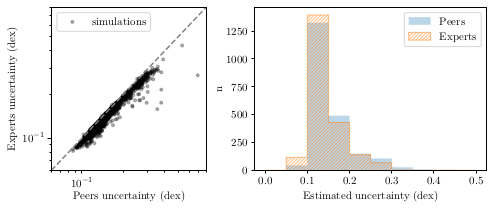

In [96]:
fig, axs = plt.subplots(1,2, figsize=(7.8,3), gridspec_kw={"width_ratios":[0.4,0.6], 'wspace':0.25})

axs[0].scatter(sigmas, sigma_ex, marker='.', color='black', alpha=0.3, label='simulations')
axs[0].set_xscale('log')
axs[0].set_xlim(0.06,0.8)
axs[0].set_ylim(0.06,0.8)
axs[0].set_xlabel('Peers uncertainty (dex)')
axs[0].set_ylabel('Experts uncertainty (dex)')
axs[0].set_yscale('log')
#axs[0].scatter(real_peers['mean_log_sigma'], real_experts['mean_log_sigma'], marker='*', color='red', alpha=0.5, label='observations')
axs[0].plot([0.06,0.8], [0.06,0.8],'--', color='gray')
axs[0].legend(loc='upper left')
axs[1].hist(sigmas, range=(0,0.5), label='Peers', alpha=0.3)
axs[1].hist(sigma_ex, range=(0,0.5), label='Experts', hatch='///////', histtype='step', alpha=0.5)
#axs[1].hist(sigma_model, range=(0,0.5), label='Model uncertainty', histtype='step', alpha=0.4, hatch='+++++')
axs[1].legend(fontsize=11)
axs[1].set_xlabel('Estimated uncertainty (dex)')
axs[1].set_ylabel('n')

plt.savefig('images/peersvsexperts.pdf', bbox_inches='tight')

NameError: name 'stderr_peers' is not defined

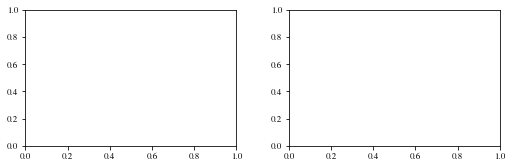

In [29]:
fig, axs = plt.subplots(1,2, figsize=(8.5,2.5), gridspec_kw={"width_ratios":[0.5,0.5], 'wspace':0.25})

x = np.linspace(-5,5,100)
axs[0].hist(stderr_peers, bins=30, density=True, color='black',histtype='step',hatch='/////',range=(-3,3))
axs[0].plot(x, norm.pdf(x), color='red')
axs[0].set_xlabel('Standardized error $(M_t - M_p)/\sigma$')
axs[0].set_ylabel('Normalized distribution')
axs[0].set_title(f'Peers mode \n mean: {stderr_peers.mean():.1e}, std: {stderr_peers.std():.2f}')

axs[1].hist(stderr_ex, bins=30, density=True, color='black',histtype='step',hatch='/////',range=(-5,5))
axs[1].plot(x, norm.pdf(x), color='red')
axs[1].set_xlabel('Standardized error $(M_t - M_p)/\sigma$')
axs[1].set_ylabel('Normalized distribution')
axs[1].set_title(f'Experts mode \n mean: {stderr_ex.mean():.1e}, std: {stderr_ex.std():.2f}')

plt.savefig('images/peersvsexerr.pdf', bbox_inches='tight')

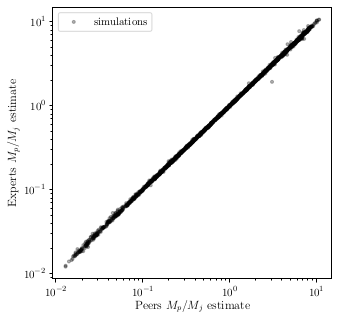

In [99]:
plt.gcf().set_size_inches(5,5)
plt.scatter(10**mpred, 10**mpred_ex, marker='.', color='black', alpha=0.3, label='simulations')
#plt.scatter(real_peers['m_pred'], real_experts['m_pred'], marker='*', color='red', alpha=0.5, label='observations')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peers $M_p/M_j$ estimate', size=12)
plt.ylabel('Experts $M_p/M_j$ estimate', size=12)
plt.legend()
plt.savefig('images/peersvsexpred.pdf')